# Clustering Analysis - Project 1

Michael Nardelli CSE 447

Clustering analysis performed on two data sets. Simulation datasets that contain a square and ellipitcal shapes as well as a real world gene data set.

K-means and spectral clustering on both data sets.

## Workspace  Setup


In [2]:
from google.colab import drive
import os 
drive.mount('/content/drive')

dpath = '/content/drive/MyDrive/CSE447/Data/'   # Configure your own data path

Mounted at /content/drive


## Install necessary package

In [ ]:
pip install --upgrade category_encoders -q  # used to convert categorical values to numerical values

In [3]:
import pandas as pd
from sklearn import cluster
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm
import sklearn
from sklearn.cluster import SpectralClustering
from sklearn.metrics import pairwise_distances

## Converting Data from Input Files to Usable Tables

Using pandas, we are able to load in the data from the square and ellipitical data sets.

They are loaded into square_data and e_data below:

In [63]:
print("Loading Square Data")
square_data = pd.read_csv('/content/drive/MyDrive/CSE447/Data/square.txt', sep=" ", header=None)
square_data.columns = ["x", "y"]
square_data
square_data_raw = square_data.copy(deep=True)
print("Loaded Square Data")

print("Loading Elliptical Data")
e_data = pd.read_csv('/content/drive/MyDrive/CSE447/Data/elliptical.txt', sep=" ", header=None)
e_data.columns = ["x", "y"]
e_data_raw = e_data.copy(deep=True)
e_data




Loading Square Data
Loaded Square Data
Loading Elliptical Data


,x,y
0,0.0043,0.1927
1,-0.1463,-0.0819
2,-0.0179,-0.0826
3,0.0891,0.2139
4,-0.0302,0.1504
...,...,...
995,-0.2423,-0.3071
996,0.3767,0.1050
997,0.2795,0.2758
998,-0.0928,0.4046


Our goal with this simulation data is to find two clusters in the simulated data.

Using cluster from sklearn to create clusters with a size of 2. We can then plot the data to visualize it.

In [68]:
def k_means(dataframe, clusters, iters):
  k_means = cluster.KMeans(n_clusters=clusters, max_iter=iters, random_state=3)
  k_means.fit(dataframe) 
  return k_means

The k-means clustering algorithm assigns the first three users to one cluster and the last three users to the second cluster. The results are consistent with our expectation. We can also display the centroid for each of the two clusters.

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<AxesSubplot:title={'center':'Eliptical'}, xlabel='x', ylabel='y'>

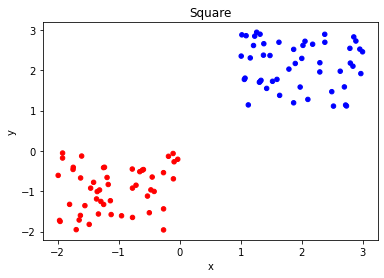

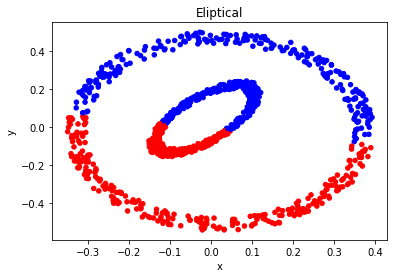

In [72]:
sq = k_means(square_data_raw, 2 , 50)
square_data['Labels'] = sq.labels_
square_data['c'] = square_data.Labels.map({0:'r', 1:'b'}) #Provides a color based on the given label
square_data.plot.scatter(x="x", y="y", c=square_data.c, title='Square')

e = k_means(e_data_raw, 2 , 50)
e_data['Labels'] = e.labels_
e_data['c'] = e_data.Labels.map({0:'r', 1:'b'}) #Provides a color based on the given label
e_data.plot.scatter(x="x", y="y", c=e_data.c, title='Eliptical')




Getting the centroids for the square data.

In [7]:
centroids_square = sq.cluster_centers_
print("Square")
display(pd.DataFrame(centroids_square,columns=square_data_raw.columns))
print("")
print("Elliptical")
centroids_e = e.cluster_centers_
pd.DataFrame(centroids_e,columns=e_data_raw.columns)

Square


,x,y
0,-1.073828,-0.947362
1,1.930526,2.131636



Elliptical


,x,y
0,-0.050940,-0.217789
1,0.048553,0.207581


Getting the centroids for the elliptical data.

## Spectral Clustering on the Simulation Data

Since the performance of k-means clustering is so poor for the ellipitical data, we need to implment spectral clustering for improved performance.

In [8]:
square_spec_data = square_data_raw.copy(deep=True)
e_spec_data = e_data_raw.copy(deep=True)

In the following, SpectralClustering was used from sklearn's cluster. The input paramenters were n_clusters - which is the number of desired clusters which in our case is 2. random_state is the a random number generater used for the initialization of the lobpcg eigenvectors, using the int of 1 makes the results deterministic. affinity as rbf uses the radial basis function kernel to construct the affinity matrix. Finally gamma, which is the only varied input between the two data sets is the kernel coefficient for rbf. Therefore large numbers need to be used for data that is radial rather than globular. 

#Spectral Clustering Using Built-In Gaussian Laplacian

In [9]:
def spectral(dataframe, clusters, gamma):
  spectral = cluster.SpectralClustering(n_clusters=clusters,random_state=1,affinity='rbf',gamma=gamma)
  spectral.fit(dataframe)
  return spectral

<AxesSubplot:title={'center':'Elliptical'}, xlabel='x', ylabel='y'>

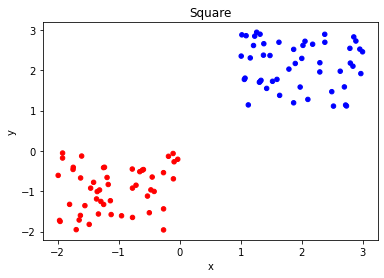

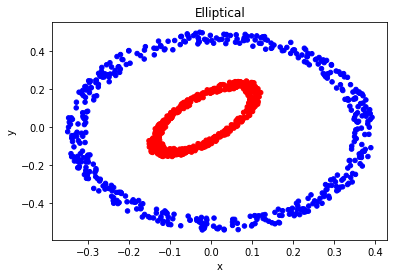

In [74]:
  square_spec = spectral(square_data_raw, 2, 5)
  square_spec_data['Labels'] = square_spec.labels_ 
  square_spec_data['c'] = square_spec_data.Labels.map({0:'r', 1:'b'}) #Provides a color based on the given label
  square_spec_data.plot.scatter(x="x", y="y", c=square_spec_data.c, title='Square')

  e_spec = spectral(e_data_raw, 2, 200)
  e_spec_data['Labels'] = e_spec.labels_
  e_spec_data['c'] = e_spec_data.Labels.map({0:'r', 1:'b'}) #Provides a color based on the given label
  e_spec_data.plot.scatter(x="x", y="y", c=e_spec_data.c, title='Elliptical')


#Converting Tables to numpy arrays

In [11]:
sq_matrix = square_data_raw.to_numpy()
e_matrix = e_data_raw.to_numpy()

#Function To Find the Cosine Simularity

In [12]:
def cos_sim(A):
  B = np.array(norm(A, axis = 1))
  B = B.reshape(B.shape[0], 1)
  B = np.dot(B, B.T)  
  B = np.dot(A, A.T) / B
  B = B - np.identity(B.shape[0])*B
  return B

#Function to find the kernel distance

In [13]:
def kernel_func(p1, p2, gamma):
  dist = norm(p1 - p2)
  return np.exp(-gamma * dist ** 2)

def gauss_distance(A, gamma):
  size = A.shape[0]
  out = np.ones((size, size))
  for i in range(A.shape[0]):
    for j in range(A.shape[0]):
      out[i][j] = kernel_func(A[i], A[j], gamma)
  out = out - np.identity(out.shape[0])*out
  return out

#Unnormalized Laplacian Function

In [14]:
def degree_matrix(C):
  A = C.copy()
  for i in range(A.shape[0]):
    for j in range(A.shape[0]):
      if i == j:
        continue 
      else:
        A[i][i] = A[i][i] + A[i][j]
  return A * np.identity(A.shape[0])


def unnormalized_lap(A, sim_type, gamma):
  #A becomes the weight matrix
  if sim_type == "cos_sim":
    A = cos_sim(A)
  else:
    A = gauss_distance(A, gamma)
  #Find degree matrix from weight matrix and subtract A from it
  B = degree_matrix(A)
  return B - A


#Normalized Laplacian

In [15]:
from numpy.linalg import matrix_power

def normalized_lap(A, sim_type):
  if sim_type == "cos_sim":
    B = cos_sim(A)
  else:
    B = gauss_distance(A)
  
  D = degree_matrix(B)
  D = np.linalg.inv(matrix_power(D, 2))

  return np.dot(np.dot(D, unnormalized_lap(A, sim_type)), D)

#Range Normalization


In [16]:
def range_norm(A):
  A = A.astype(np.float32)
  for i in range(A.shape[1]):
    min = A[:, i].min()
    max = A[:, i].max()
    A[:, i] = (A[:, i] - min)/(max-min)
  return A

#Normalized Laplacian Using Cosine Simularity

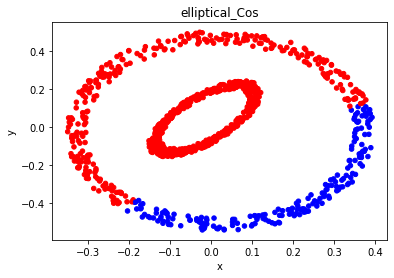

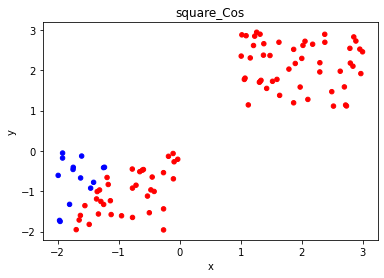

In [75]:
def Normalized_Cos_Lap(orig_df, matrix, gamma, n, title):
  affinity = cos_sim(range_norm(matrix))
  embedded = sklearn.manifold.spectral_embedding(affinity, norm_laplacian=True, n_components=n)
  embedded_labels = SpectralClustering(n_clusters=2).fit_predict(embedded)
  labels1 = pd.DataFrame(embedded_labels ,columns=['Cluster ID'])
  orig_df['Labels'] = labels1 
  orig_df['c'] = orig_df.Labels.map({0:'r', 1:'b'}) #Provides a color based on the given label
  orig_df.plot.scatter(x="x", y="y", c=orig_df.c, title=title)


Normalized_Cos_Lap(e_spec_data.copy(), e_matrix, 0, 4, 'elliptical_Cos')
Normalized_Cos_Lap(square_spec_data.copy(), sq_matrix, 0, 2, 'square_Cos')

#Spectral Clustering Using Our Created Matrices

SPECTRAL EMBEDDING

In [18]:
def Not_Normalized_Lap_Gauss(orig_df, matrix, gamma, n, title):
  affinity = gauss_distance(matrix, gamma)
  Not_Normalized_Lap(orig_df, affinity, gamma, n, title)

def Not_Normalized_Lap_Cos(orig_df, matrix, gamma, n, title):
  affinity = range_norm(cos_sim(matrix))
  Not_Normalized_Lap(orig_df, affinity, gamma, n, title)

def Not_Normalized_Lap(orig_df, affinity, gamma, n, title):
  embedded = sklearn.manifold.spectral_embedding(affinity, norm_laplacian=False, n_components=n)
  embedded_labels = SpectralClustering(n_clusters=2).fit_predict(embedded)
  labels1 = pd.DataFrame(embedded_labels ,columns=['Cluster ID'])
  orig_df['Labels'] = labels1 
  orig_df['c'] = orig_df.Labels.map({0:'r', 1:'b'}) #Provides a color based on the given label
  orig_df.plot.scatter(x="x", y="y", c=orig_df.c, title=title)
  


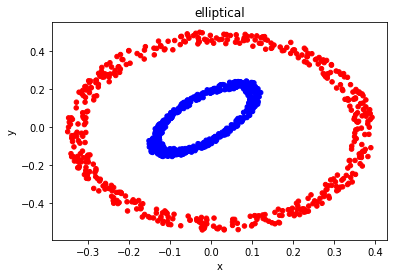

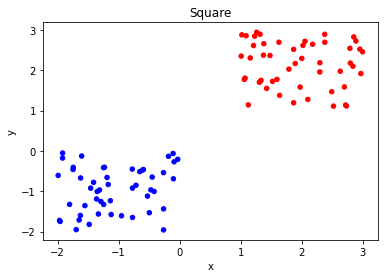

In [76]:
Not_Normalized_Lap_Gauss(e_spec_data.copy(), e_matrix, 200, 8, 'elliptical')
Not_Normalized_Lap_Gauss(square_spec_data.copy(), sq_matrix, 5, 8, 'Square')

/usr/local/lib/python3.9/dist-packages/sklearn/manifold/_spectral_embedding.py:248: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)
/usr/local/lib/python3.9/dist-packages/sklearn/manifold/_spectral_embedding.py:248: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)


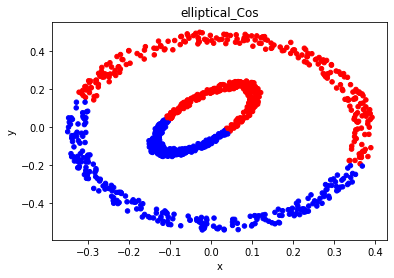

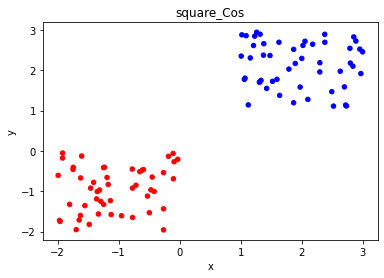

In [20]:
Not_Normalized_Lap_Cos(e_spec_data.copy(), e_matrix, 0, 8, 'elliptical_Cos')
Not_Normalized_Lap_Cos(square_spec_data.copy(), sq_matrix, 0, 2, 'square_Cos')

#PART 2 - REAL WORLD DATA

In [21]:
print("Loading Cho Data")
cho = pd.read_csv('/content/drive/MyDrive/CSE447/Data/cho.txt', header=None, delim_whitespace=True)
cho.columns = ["gene_id", "ground_truth_cluster", "x1", "x2", "x3", "x4", "x5", "x6", "x7", "x8","x9", "x10", "x11", "x12", "x13", "x14", "x15", "x16" ]
cho_raw = cho.copy(deep=True)

print("Loading Iyer Data")
iyer = pd.read_csv('/content/drive/MyDrive/CSE447/Data/iyer.txt', header=None, delim_whitespace=True)
iyer.columns = ["gene_id", "ground_truth_cluster", "x1", "x2", "x3", "x4", "x5", "x6", "x7", "x8","x9", "x10", "x11", "x12"]
iyer_raw = iyer.copy(deep=True)
cho

Loading Cho Data
Loading Iyer Data


,gene_id,ground_truth_cluster,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16
0,1,1,-0.69,-0.96,-1.16,-0.66,-0.55,0.12,-1.07,-1.22,0.82,1.40,0.71,0.68,0.110,-0.040,0.190,0.82
1,2,1,-0.21,0.19,0.86,0.04,-0.35,-0.39,-0.51,-0.20,0.00,0.77,0.41,0.14,-0.450,-1.230,-0.325,0.00
2,3,1,-0.30,-0.56,-0.29,-0.50,-0.27,-0.29,-0.56,-1.04,0.32,0.90,0.45,0.17,0.164,-0.120,-0.160,0.67
3,4,1,0.07,0.26,-0.47,-0.68,-0.63,-0.39,0.07,0.79,0.58,0.31,-0.14,-0.29,-0.103,-0.200,-0.060,0.36
4,5,1,-1.04,0.13,0.51,-0.44,-0.88,-0.32,0.21,0.95,1.07,0.38,0.01,-0.13,-0.780,-0.130,0.092,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,382,5,-0.64,-0.76,-0.55,-0.68,-0.66,-0.09,0.26,0.41,0.51,0.18,0.09,-0.23,0.040,0.274,0.980,0.52
382,383,5,-0.01,-0.82,-0.65,-0.43,-0.28,-0.48,0.23,0.58,0.31,0.15,-0.24,-0.52,0.021,0.370,0.570,0.65
383,384,5,-3.12,-4.12,-3.54,-1.54,-0.37,1.48,2.45,2.77,1.81,-0.26,-0.73,0.34,0.710,1.480,2.060,2.36
384,385,5,-0.79,-0.56,-0.79,-0.23,-0.53,-0.14,0.61,0.95,0.96,0.38,-0.11,-0.31,-0.410,0.490,0.080,0.15


#Performing KMeans and Spectral Clustering on Cho

In [22]:
k_means_cho = cluster.KMeans(n_clusters=5, max_iter=200, random_state=1)
fit_cho = cho_raw.copy()
fit_cho = fit_cho.drop(['gene_id', 'ground_truth_cluster'], axis=1)
k_means_cho.fit(fit_cho) 

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=200, n_clusters=5, random_state=1)

#PCA on Kmeans of Cho

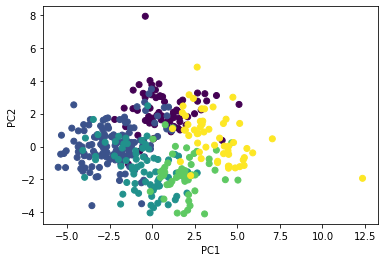

In [23]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(fit_cho)

# PCA
pca = PCA().fit(scaled_data)

data2D = pca.transform(scaled_data)

plt.scatter(data2D[:, 0], data2D[:, 1],
            c=cho_raw['ground_truth_cluster'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

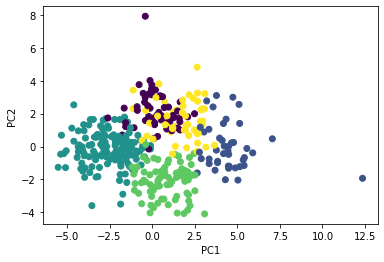

In [24]:
plt.scatter(data2D[:, 0], data2D[:, 1],
            c=k_means_cho.labels_)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

#Creating Confusion Matrix

In [25]:
# Prep
def create_confusion_matrix(generated, truth):
  k_labels = generated  # Get cluster labels
  k_labels_matched = np.empty_like(k_labels)

  # For each cluster label...
  for k in np.unique(k_labels):

      # ...find and assign the best-matching truth label
      match_nums = [np.sum((k_labels==k)*(truth==t)) for t in np.unique(truth)]
      k_labels_matched[k_labels==k] = np.unique(truth)[np.argmax(match_nums)]
    
  # Compute confusion matrix
  from sklearn.metrics import confusion_matrix
  cm = confusion_matrix(truth, k_labels_matched)
  
  #Calculates accuracy
  total = np.sum(cm)
  correct = np.sum(np.identity(cm.shape[0]) * cm)
  accuracy = correct/total

  # Plot confusion matrix
  plt.imshow(cm,interpolation='none',cmap='Blues')
  for (i, j), z in np.ndenumerate(cm):
      plt.text(j, i, z, ha='center', va='center')
  plt.xlabel("kmeans label")
  plt.ylabel("truth label")
  plt.show()

  print("Total Classified: " + str(total))
  print("Correctly Classified: "  + str(correct))
  print('Accuracy:' + str(accuracy))
  return accuracy

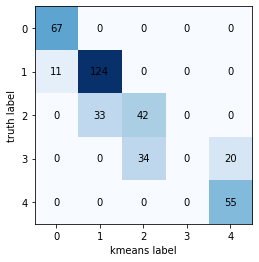

Total Classified: 386
Correctly Classified: 288.0
Accuracy:0.7461139896373057


0.7461139896373057

In [26]:
create_confusion_matrix(k_means_cho.labels_, cho['ground_truth_cluster'])

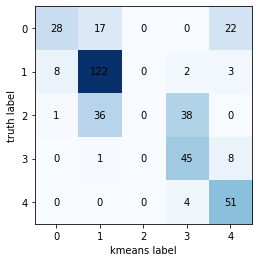

Total Classified: 386
Correctly Classified: 246.0
Accuracy:0.6373056994818653


0.6373056994818653

In [79]:
# val = 0.001
# max = 0
# time = 0
# for i in range(1000):
  
spec_cho = cluster.SpectralClustering(n_clusters=5,random_state=1,affinity='rbf',gamma=1.1)
fit_cho = cho_raw.copy()
fit_cho = fit_cho.drop(['gene_id', 'ground_truth_cluster'], axis=1)
spec_cho.fit(fit_cho)

create_confusion_matrix(spec_cho.labels_, cho['ground_truth_cluster'])



#Iyer with noise

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


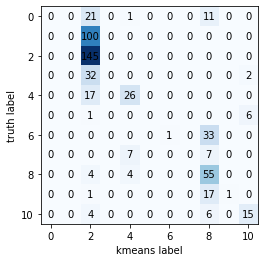

Total Classified: 517
Correctly Classified: 243.0
Accuracy:0.4700193423597679


0.4700193423597679

In [27]:
k_means_iyer = cluster.KMeans(n_clusters=10, max_iter=200, random_state=1)
fit_iyer = iyer_raw.copy()
fit_iyer = fit_iyer.drop(['gene_id', 'ground_truth_cluster'], axis=1)
k_means_iyer.fit(fit_iyer) 

create_confusion_matrix(k_means_iyer.labels_, iyer['ground_truth_cluster'])

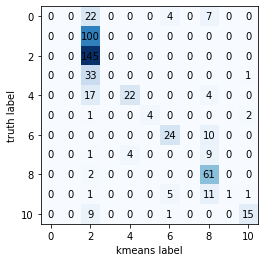

Total Classified: 517
Correctly Classified: 272.0
Accuracy:0.5261121856866537


0.5261121856866537

In [48]:

spec_iyer = cluster.SpectralClustering(n_clusters=10,random_state=1,affinity='rbf',gamma=0.001)
fit_iyer = iyer_raw.copy()
fit_iyer = fit_iyer.drop(['gene_id', 'ground_truth_cluster'], axis=1)
spec_iyer.fit(fit_iyer)

create_confusion_matrix(spec_iyer.labels_, iyer['ground_truth_cluster'])
  
  

#Removing Outliers

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


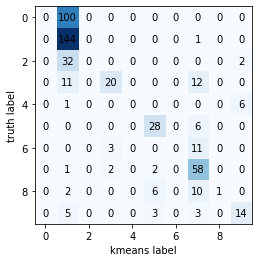

Total Classified: 484
Correctly Classified: 265.0
Accuracy:0.5475206611570248


0.5475206611570248

In [29]:
iyer_processed = iyer_raw.copy()
iyer_processed = iyer_processed[iyer_processed['ground_truth_cluster']!= -1]

k_means_iyer_p = cluster.KMeans(n_clusters=10, max_iter=200, random_state=1)
fit_iyer_p = iyer_processed.copy()
fit_iyer_p = fit_iyer_p.drop(['gene_id', 'ground_truth_cluster'], axis=1)
k_means_iyer_p.fit(fit_iyer_p) 

create_confusion_matrix(k_means_iyer_p.labels_, iyer_processed['ground_truth_cluster'])

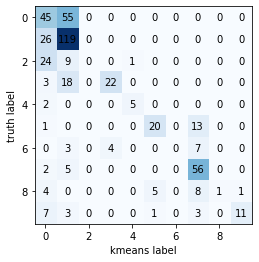

Total Classified: 484
Correctly Classified: 279.0
Accuracy:0.5764462809917356


0.5764462809917356

In [46]:
spec_iyer_p = cluster.SpectralClustering(n_clusters=10,random_state=1,affinity='rbf',gamma=0.001)
fit_iyer_p = iyer_processed.copy()
fit_iyer_p = fit_iyer_p.drop(['gene_id', 'ground_truth_cluster'], axis=1)
spec_iyer_p.fit(fit_iyer_p)

create_confusion_matrix(spec_iyer_p.labels_, iyer_processed['ground_truth_cluster'])

#Use of SSE To Compare Errors Between K means and Spectral

In [49]:
def SSE_kmeans(A, cluster_center, data_set, num_clusters):
  sse = 0
  for i in range(num_clusters):
    cluster_values = A[A['Labels'] == i]
    cluster_values = cluster_values.drop(['gene_id', 'ground_truth_cluster', 'Labels'], axis=1)
    cluster_values = cluster_values.to_numpy()
    centroid = cluster_center[i]
    #print(centroid)
    distances = pairwise_distances(cluster_values, centroid.reshape(1, -1))
    sse = sse + np.sum(distances**2)
  print("SSE For KMeans Clustering " + data_set + " Dataset")
  print(sse)
  print("\n")




def SSE_Spectral(A, data_set, num_clusters):
  sse = 0
  for i in range(num_clusters):
      cluster_values = A[A['Labels'] == i]
      cluster_values = cluster_values.drop(['gene_id', 'ground_truth_cluster', 'Labels'], axis=1)
      cluster_values = cluster_values.to_numpy()
      centroid = np.mean(cluster_values, axis=0)
      distances = pairwise_distances(cluster_values, centroid.reshape(1, -1))
      sse = sse + np.sum(distances**2)
  print("SSE For Spectral Clustering " + data_set + " Dataset")
  print(sse)
  print("\n")


fit_iyer_p_E = iyer_processed.copy(deep=True)
fit_iyer_p_E['Labels'] = spec_iyer_p.labels_
SSE_Spectral(fit_iyer_p_E, "Iyer", 10)

spec_cho_sse = cho_raw.copy(deep=True)
spec_cho_sse['Labels'] = spec_cho.labels_
SSE_Spectral(fit_iyer_p_E, "Cho", 5)

sse_iyer_kmeans = iyer_processed.copy(deep=True)
sse_iyer_kmeans['Labels'] = k_means_iyer_p.labels_
SSE_kmeans(sse_iyer_kmeans, k_means_iyer_p.cluster_centers_, "Iyer", 10)

sse_cho_kmeans = cho_raw.copy(deep=True)
sse_cho_kmeans['Labels'] = k_means_cho.labels_
SSE_kmeans(sse_cho_kmeans, k_means_cho.cluster_centers_, "Cho", 5)

SSE For Spectral Clustering Iyer Dataset
2695.667384787349


SSE For Spectral Clustering Cho Dataset
1625.7121575512583


SSE For KMeans Clustering Iyer Dataset
1939.7384769234206


SSE For KMeans Clustering Cho Dataset
976.6560389522393




#Impacts of Normalization

In [50]:
#Normalizing both data sets 
#z-score normalization
def z_norm(A):
  A = A.astype(np.float32)
  for i in range(A.shape[1]):
    avg = np.average(A[:, i])
    std = np.std(A[:, i])
    A[:, i] = (A[:, i] - avg)/(std)
  return A

In [51]:
cho_norm = cho_raw.copy().drop(['gene_id', 'ground_truth_cluster'], axis=1)
cho_norm = pd.DataFrame(range_norm(cho_norm.to_numpy()))
iyer_norm = iyer_processed.copy().drop(['gene_id', 'ground_truth_cluster'], axis=1) 
iyer_norm = range_norm(iyer_norm.to_numpy())
iyer_norm[:, 0] = 0
iyer_norm = pd.DataFrame(iyer_norm)

<ipython-input-16-407de9c5ba12>:6: RuntimeWarning: invalid value encountered in true_divide
  A[:, i] = (A[:, i] - min)/(max-min)


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cho Kmeans


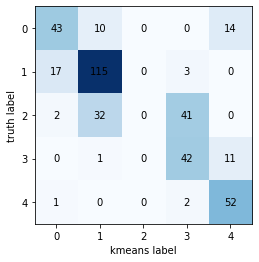

Total Classified: 386
Correctly Classified: 252.0
Accuracy:0.6528497409326425

Cho Spectral


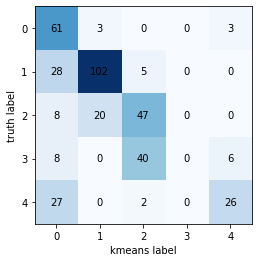

Total Classified: 386
Correctly Classified: 236.0
Accuracy:0.6113989637305699

Iyer Kmeans


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


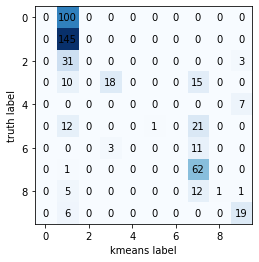

Total Classified: 484
Correctly Classified: 246.0
Accuracy:0.5082644628099173

Iyer Spectral


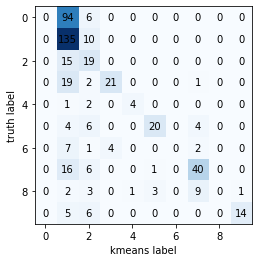

Total Classified: 484
Correctly Classified: 253.0
Accuracy:0.5227272727272727


0.5227272727272727

In [55]:
k_cho_norm = cluster.KMeans(n_clusters=5,max_iter=200, random_state=1)
fit_cho_norm = cho_norm.copy()
k_cho_norm.fit(fit_cho_norm)

print("Cho Kmeans")
create_confusion_matrix(k_cho_norm.labels_, cho['ground_truth_cluster'])

spec_cho_norm = cluster.SpectralClustering(n_clusters=5,random_state=1,affinity='rbf',gamma=0.39)
fit_cho_norm = cho_norm.copy()
spec_cho_norm.fit(fit_cho_norm)
print("")
print("Cho Spectral")
create_confusion_matrix(spec_cho_norm.labels_, cho['ground_truth_cluster'])

k_iyer_norm = cluster.KMeans(n_clusters=10,max_iter=200, random_state=1)
fit_iyer_norm = iyer_norm.copy()
k_iyer_norm.fit(fit_iyer_norm)

print("")
print("Iyer Kmeans")
create_confusion_matrix(k_iyer_norm.labels_, iyer_processed['ground_truth_cluster'])

spec_iyer_norm = cluster.SpectralClustering(n_clusters=10,random_state=1,affinity='rbf',gamma=.05)
fit_iyer_norm = iyer_norm.copy()
spec_iyer_norm.fit(fit_iyer_norm)

print("")
print("Iyer Spectral")
create_confusion_matrix(spec_iyer_norm.labels_, iyer_processed['ground_truth_cluster'])